In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import openweathermapy.core as owm
# Import API key
from api_keys import api_key
from urllib.error import URLError, HTTPError

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [10]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

In [96]:
#writing to a csv file
city=pd.DataFrame(cities)
city.to_csv("C:/Users/Mohamed/Downloads/Class-Repository/pandas/api_homework/output_data/cities1.csv")

In [35]:
cities_dataset=pd.DataFrame(cities)
cities_dataset=cities_dataset.rename(columns={0:"City"})

cities_dataset['Cloudiness']=" "   
cities_dataset['Country']=" "       
cities_dataset['Date']=" "          
cities_dataset['Humidity']=" "      
cities_dataset['Lat']=""           
cities_dataset['Lng']=""           
cities_dataset['Max Temp']=""      
cities_dataset['Wind Speed']=""  

cities_dataset.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bellevue,,,,,,,,
1,bluff,,,,,,,,
2,busselton,,,,,,,,
3,atuona,,,,,,,,
4,comodoro rivadavia,,,,,,,,
5,christchurch,,,,,,,,
6,batemans bay,,,,,,,,
7,saleaula,,,,,,,,
8,kaitangata,,,,,,,,
9,kapaa,,,,,,,,


In [36]:
len(cities_dataset)

584

In [51]:

settings = {"units": "Imperial", "appid": api_key}
current_weather =[]
call_cnt = 0 
set=0
for index,row in cities_dataset.iterrows():
    c=row['City']
    if call_cnt < 50:
        call_cnt += 1
        try: 
            current_weather = owm.get_current(c, **settings)
            if current_weather['coord']['lat'] is not None:
                results =current_weather
                cities_dataset.loc[index, 'Cloudiness'] = results['clouds']['all']
                cities_dataset.loc[index, 'Country'] = results['sys']['country']
                cities_dataset.loc[index, 'Date'] = results['dt']
                cities_dataset.loc[index, 'Humidity'] = results['main']['humidity']
                cities_dataset.loc[index,'Lat']=results['coord']['lat']           
                cities_dataset.loc[index,'Lon']=results['coord']['lon']         
                cities_dataset.loc[index,'Max Temp']=results['main']['temp_max']     
                cities_dataset.loc[index,'Wind Speed']=results['wind']['speed']
                print("Processing Record "+str((set%50)+1) +" of Set " + str(int(set/50)+1) +" " + c +".")
                set = set+1
        except Exception as e: 
            print(" An Error Occured",e)
    else:
        time.sleep(10)
        call_cnt = 0
                
        

     
        
   
        
    

Processing Record 1 of Set 1 bellevue.
Processing Record 2 of Set 1 bluff.
Processing Record 3 of Set 1 busselton.
Processing Record 4 of Set 1 atuona.
Processing Record 5 of Set 1 comodoro rivadavia.
Processing Record 6 of Set 1 christchurch.
Processing Record 7 of Set 1 batemans bay.
 An Error Occured HTTP Error 404: Not Found
Processing Record 8 of Set 1 kaitangata.
Processing Record 9 of Set 1 kapaa.
Processing Record 10 of Set 1 smolyaninovo.
Processing Record 11 of Set 1 saba.
 An Error Occured HTTP Error 404: Not Found
Processing Record 12 of Set 1 sao joao da barra.
Processing Record 13 of Set 1 miasskoye.
Processing Record 14 of Set 1 hithadhoo.
Processing Record 15 of Set 1 vila franca do campo.
Processing Record 16 of Set 1 bathsheba.
Processing Record 17 of Set 1 najran.
Processing Record 18 of Set 1 tuktoyaktuk.
Processing Record 19 of Set 1 yellowknife.
Processing Record 20 of Set 1 danville.
 An Error Occured HTTP Error 404: Not Found
Processing Record 21 of Set 1 punta 

Processing Record 30 of Set 4 artyom.
Processing Record 31 of Set 4 sambava.
 An Error Occured HTTP Error 404: Not Found
Processing Record 32 of Set 4 dingle.
 An Error Occured HTTP Error 404: Not Found
Processing Record 33 of Set 4 katangli.
Processing Record 34 of Set 4 port keats.
Processing Record 35 of Set 4 chapais.
Processing Record 36 of Set 4 ahipara.
Processing Record 37 of Set 4 thompson.
Processing Record 38 of Set 4 hay river.
Processing Record 39 of Set 4 puerto escondido.
Processing Record 40 of Set 4 klaksvik.
Processing Record 41 of Set 4 pevek.
Processing Record 42 of Set 4 marawi.
Processing Record 43 of Set 4 evensk.
 An Error Occured HTTP Error 404: Not Found
Processing Record 44 of Set 4 wanaka.
Processing Record 45 of Set 4 skelleftea.
Processing Record 46 of Set 4 muros.
Processing Record 47 of Set 4 longyearbyen.
Processing Record 48 of Set 4 grand gaube.
Processing Record 49 of Set 4 ponta grossa.
Processing Record 50 of Set 4 tuscaloosa.
Processing Record 1 o

Processing Record 13 of Set 8 mombetsu.
Processing Record 14 of Set 8 coihaique.
Processing Record 15 of Set 8 stavern.
 An Error Occured HTTP Error 404: Not Found
Processing Record 16 of Set 8 inhambane.
Processing Record 17 of Set 8 cidreira.
Processing Record 18 of Set 8 nyahururu.
Processing Record 19 of Set 8 poya.
Processing Record 20 of Set 8 qingquan.
Processing Record 21 of Set 8 avera.
Processing Record 22 of Set 8 carauari.
Processing Record 23 of Set 8 yining.
Processing Record 24 of Set 8 warmbad.
 An Error Occured HTTP Error 404: Not Found
Processing Record 25 of Set 8 tommot.
Processing Record 26 of Set 8 saint george.
Processing Record 27 of Set 8 goderich.
Processing Record 28 of Set 8 bubaque.
Processing Record 29 of Set 8 mariental.
Processing Record 30 of Set 8 martapura.
 An Error Occured HTTP Error 404: Not Found
Processing Record 31 of Set 8 yar-sale.
Processing Record 32 of Set 8 bogorodskoye.
Processing Record 33 of Set 8 luganville.
Processing Record 34 of Set

In [53]:

#len(cities_dataset)
cities_dataset.count()

City          584
Cloudiness    584
Country       584
Date          584
Humidity      584
Lat           584
Max Temp      584
Wind Speed    584
Lon           513
dtype: int64

In [90]:
#writing to a csv file
cities_cleaned.to_csv("C:/Users/Mohamed/Downloads/Class-Repository/pandas/api_homework/output_data/cities.csv")


In [58]:


cities_cleaned=cities_dataset.dropna()

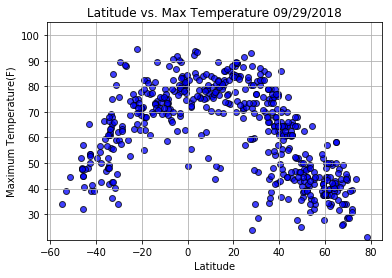

In [89]:

#latitude vs temperature

#xaxis=cities_cleaned['Lat']
#yaxis=cities_cleaned['Max Temp']
def map(xaxis,yaxis):    
    sc_plt=plt.scatter(xaxis,yaxis, marker='o', facecolors='blue', edgecolors="black", alpha=0.75)
    return sc_plt,plt.grid()


map(cities_cleaned['Lat'],cities_cleaned['Max Temp'])
yt=np.arange(30,105,10)
plt.yticks(yt)
plt.ylim(20,105,10)
plt.title(f"Latitude vs. Max Temperature {datetime.datetime.now():%m/%d/%Y}")
plt.xlabel("Latitude")
plt.ylabel(f"Maximum Temperature(F)")
plt.savefig("C:/Users/Mohamed/Downloads/Class-Repository/pandas/api_homework/output_data/latvstemp.png")

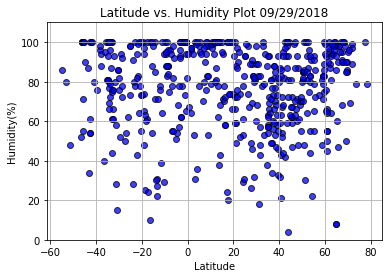

In [86]:
#Latitude vs. Humidity Plot
map(cities_cleaned['Lat'],cities_cleaned['Humidity'])
plt.ylim(0,110,50)
plt.title(f"Latitude vs. Humidity Plot {datetime.datetime.now():%m/%d/%Y}")
plt.xlabel("Latitude")
plt.ylabel(f"Humidity(%)")
plt.savefig("C:/Users/Mohamed/Downloads/Class-Repository/pandas/api_homework/output_data/latvshumidity.png")

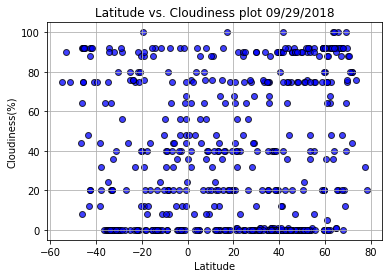

In [87]:
#Latitude vs. Cloudiness Plot
map(cities_cleaned['Lat'],cities_cleaned['Cloudiness'])
plt.title(f"Latitude vs. Cloudiness plot {datetime.datetime.now():%m/%d/%Y}")
plt.xlabel("Latitude")
plt.ylabel(f"Cloudiness(%)")
plt.savefig("C:/Users/Mohamed/Downloads/Class-Repository/pandas/api_homework/output_data/latvscloud.png")

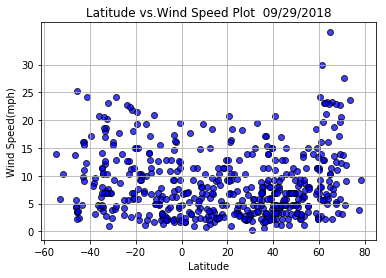

In [88]:
#Latitude vs. Wind Speed Plot
map(cities_cleaned['Lat'],cities_cleaned['Wind Speed'])
plt.yticks([0,5,10,15,20,25,30])
plt.title(f"Latitude vs.Wind Speed Plot  {datetime.datetime.now():%m/%d/%Y}")
plt.xlabel("Latitude")
plt.ylabel(f"Wind Speed(mph)")
plt.savefig("C:/Users/Mohamed/Downloads/Class-Repository/pandas/api_homework/output_data/latvswind.png")